In [ ]:
!pip install ultralytics

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 716.2/716.2 kB 10.9 MB/s eta 0:00:00


In [ ]:
import pandas as pd
import numpy as np
from ultralytics import YOLO
import torch
import shutil
import os
import random
from PIL import Image
import cv2
import matplotlib.pyplot as plt
import yaml

In [ ]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="f32xFqYKZCtMrVK7IGmM")
project = rf.workspace("potatao-weeds").project("sesame-weed-detection")
dataset = project.version(1).download("yolov8")


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 70.2/70.2 kB 1.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 158.3/158.3 kB 12.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 178.7/178.7 kB 12.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.8/58.8 kB 8.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.1/49.1 MB 12.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.7/86.7 kB 13.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.5/54.5 kB 9.3 MB/s eta 0:00:00
  Attempting uninstall: opencv-python-headless
    Found existing installation: opencv-python-headless 4.9.0.80
    Uninstalling opencv-python-headless-4.9.0.80:
      Successfully uninstalled opencv-python-headless-4.9.0.80
  Attempting uninstall: idna
    Found existing installation: idna 3.6
    Uninstalling idna-3.6:
      Successfully uninstalled idna-3.6
  Attempting uninstall: cycler
    Found existing installation: cycle

loading Roboflow workspace...
loading Roboflow project...
Dependency ultralytics==8.0.196 is required but found version=8.1.19, to fix: `pip install ultralytics==8.0.196`



Extracting Dataset Version Zip to sesame-weed-detection-1 in yolov8:: 100%|██████████| 7289/7289 [00:01<00:00, 3993.73it/s]


In [ ]:
# Use this code snippet for creating yaml file(alternative to using roboflow)
dataset = {
'train': '/content/sesame-weed-detection-1/train',
'val': '/content/sesame-weed-detection-1/test',
'nc': 2,
'names': ['crop', 'weed']
}

with open('/content/sesame-weed-detection-1/dataset.yaml', 'w') as file:
    yaml.dump(dataset, file)

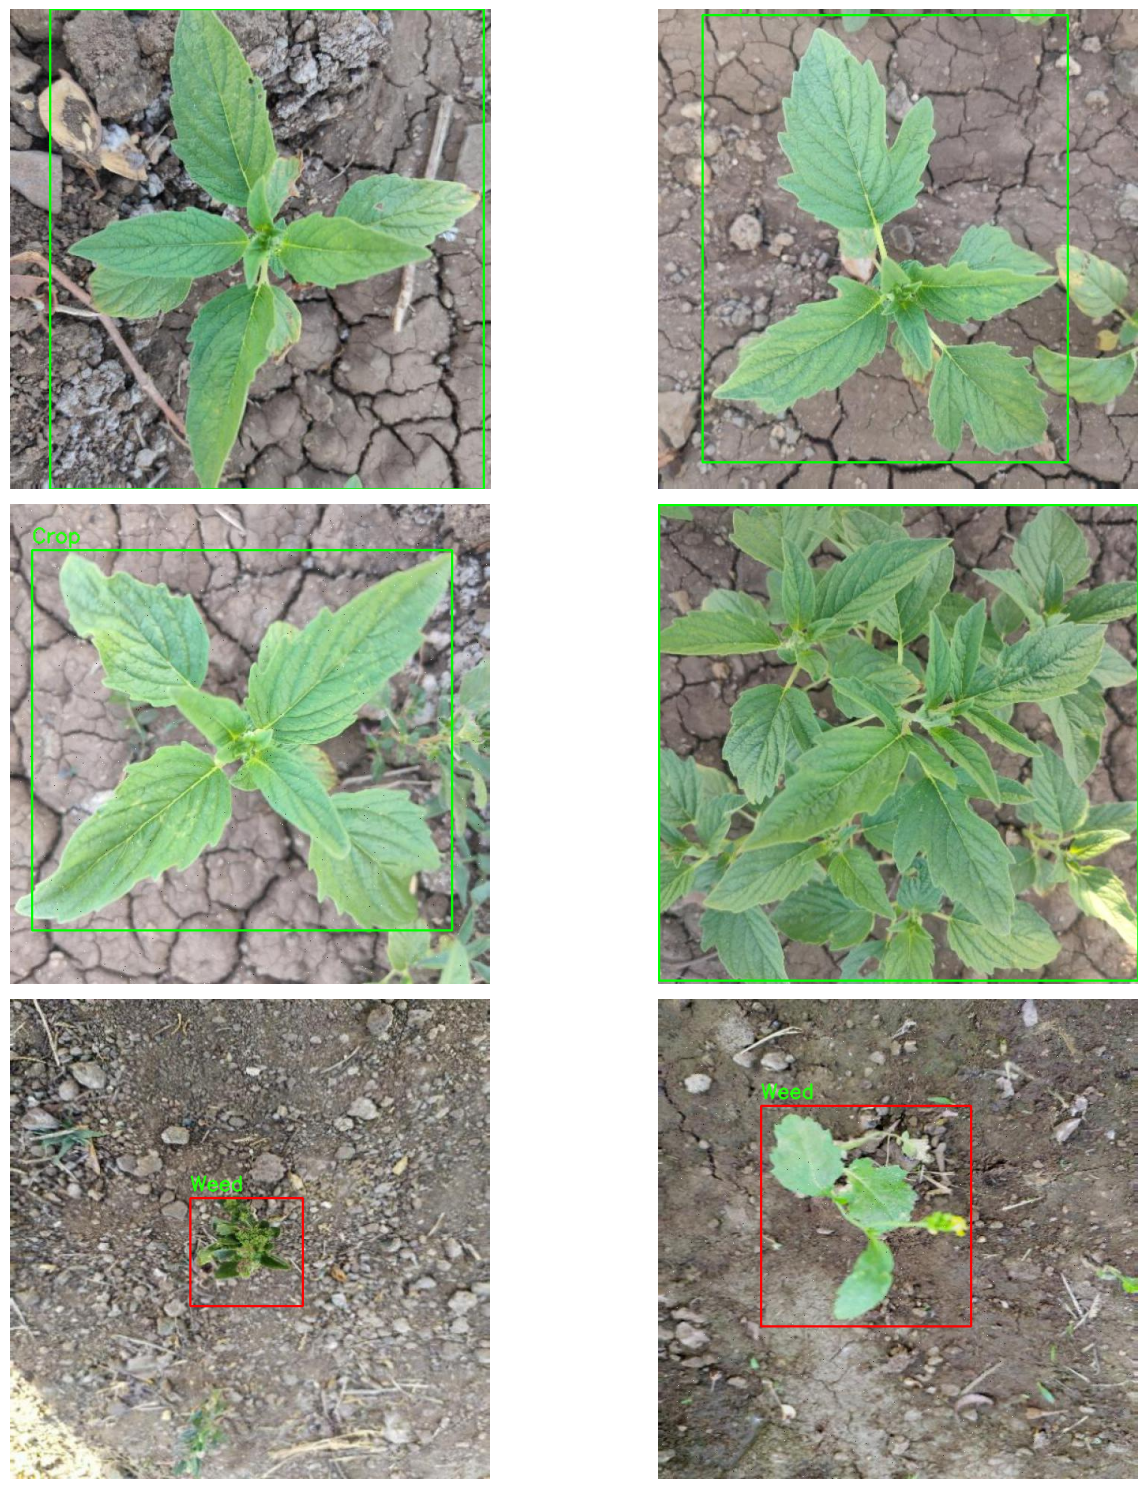

In [9]:
images_folder = "/content/sesame-weed-detection-1/train/images"
labels_folder = "/content/sesame-weed-detection-1/train/labels"
images = os.listdir(images_folder)

random.shuffle(images)
rand_images = images[:6]

num_images = len(rand_images)
fig, axes = plt.subplots(3, 2, figsize=(15,15))
axes = axes.flatten()

for i in range(num_images):
    image_path = os.path.join(images_folder, rand_images[i])
    image = cv2.imread(image_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    label_path = os.path.join(labels_folder, os.path.splitext(rand_images[i])[0] + '.txt')
    with open(label_path, 'r') as file:
        labels = file.readlines()

    for label in labels:
        class_id, x, y, width, height = map(float, label.strip().split())
        width = int(width * image.shape[0])
        height = int(height * image.shape[1])
        x = int(x * image.shape[0])-int(width/2)
        y = int(y * image.shape[1])-int(height/2)
        if class_id == 1:
          cv2.rectangle(image, (x, y), (x + width, y + height), (255, 0, 0), 2)
          cv2.putText(image, 'Weed', (x, y-10), cv2.FONT_HERSHEY_SIMPLEX, 0.9, (36,255,12), 2)
        else:
          cv2.rectangle(image, (x, y), (x + width, y + height), (0, 255, 0), 2)
          cv2.putText(image, 'Crop', (x, y-10), cv2.FONT_HERSHEY_SIMPLEX, 0.9, (36,255,12), 2)

    axes[i].imshow(image)
    axes[i].axis("off")

plt.tight_layout()
plt.show()

In [ ]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'
model = YOLO('yolov8m.pt')
model.train(data='/content/sesame-weed-detection-1/data.yaml', epochs=30, imgsz=640,
            optimizer = 'AdamW', lr0 = 1e-3,
            project = 'TG_YOLOv8m', name='mitra',
            batch=16, device=device, seed=69)

Ultralytics YOLOv8.1.19 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8m.pt, data=/content/sesame-weed-detection-1/data.yaml, epochs=30, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=cuda, workers=8, project=TG_YOLOv8m, name=mitra3, exist_ok=False, pretrained=True, optimizer=AdamW, verbose=True, seed=69, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=Tr

100%|██████████| 755k/755k [00:00<00:00, 67.0MB/s]


Overriding model.yaml nc=80 with nc=2

                   from  n    params  module                                       arguments                     
  0                  -1  1      1392  ultralytics.nn.modules.conv.Conv             [3, 48, 3, 2]                 
  1                  -1  1     41664  ultralytics.nn.modules.conv.Conv             [48, 96, 3, 2]                
  2                  -1  2    111360  ultralytics.nn.modules.block.C2f             [96, 96, 2, True]             
  3                  -1  1    166272  ultralytics.nn.modules.conv.Conv             [96, 192, 3, 2]               
  4                  -1  4    813312  ultralytics.nn.modules.block.C2f             [192, 192, 4, True]           
  5                  -1  1    664320  ultralytics.nn.modules.conv.Conv             [192, 384, 3, 2]              
  6                  -1  4   3248640  ultralytics.nn.modules.block.C2f             [384, 384, 4, True]           
  7                  -1  1   1991808  ultralytics

100%|██████████| 6.23M/6.23M [00:00<00:00, 248MB/s]


AMP: checks passed ✅


train: Scanning /content/sesame-weed-detection-1/train/labels... 3510 images, 0 backgrounds, 0 corrupt: 100%|██████████| 3510/3510 [00:01<00:00, 1808.43it/s]


train: New cache created: /content/sesame-weed-detection-1/train/labels.cache
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))


val: Scanning /content/sesame-weed-detection-1/test/labels... 130 images, 0 backgrounds, 0 corrupt: 100%|██████████| 130/130 [00:00<00:00, 948.23it/s] 

val: New cache created: /content/sesame-weed-detection-1/test/labels.cache


Plotting labels to TG_YOLOv8m/mitra3/labels.jpg... 
optimizer: AdamW(lr=0.001, momentum=0.937) with parameter groups 77 weight(decay=0.0), 84 weight(decay=0.0005), 83 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to TG_YOLOv8m/mitra3
Starting training for 30 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/30      6.89G      1.359      1.436      1.664         21        640: 100%|██████████| 220/220 [02:00<00:00,  1.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:03<00:00,  1.48it/s]

                   all        130        171      0.614      0.655      0.642      0.346



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/30      7.04G       1.39      1.329       1.66         19        640: 100%|██████████| 220/220 [01:56<00:00,  1.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  2.54it/s]

                   all        130        171      0.806      0.809      0.827      0.463



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/30      7.04G      1.351      1.249      1.628         26        640: 100%|██████████| 220/220 [01:59<00:00,  1.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  1.93it/s]

                   all        130        171      0.798      0.668       0.78      0.447



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/30      7.06G      1.335      1.215      1.614         15        640: 100%|██████████| 220/220 [01:55<00:00,  1.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  2.57it/s]

                   all        130        171      0.797      0.744      0.807      0.496



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/30      7.07G      1.289      1.133      1.578         44        640: 100%|██████████| 220/220 [01:54<00:00,  1.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  2.59it/s]

                   all        130        171      0.553      0.737      0.721       0.46



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/30      7.04G      1.263      1.084      1.561         20        640: 100%|██████████| 220/220 [01:54<00:00,  1.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  2.09it/s]

                   all        130        171      0.896      0.796      0.886      0.559



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/30      7.09G      1.238      1.059      1.532         15        640: 100%|██████████| 220/220 [01:54<00:00,  1.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  2.54it/s]

                   all        130        171      0.886      0.835      0.914      0.604



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/30      7.06G      1.218      1.015      1.526         20        640: 100%|██████████| 220/220 [01:54<00:00,  1.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  2.31it/s]


                   all        130        171      0.857       0.82      0.893      0.582

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/30      7.07G      1.193      0.978      1.509         19        640: 100%|██████████| 220/220 [01:54<00:00,  1.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  2.59it/s]

                   all        130        171      0.889      0.854      0.893      0.601



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/30      7.04G      1.173     0.9618      1.492         11        640: 100%|██████████| 220/220 [01:54<00:00,  1.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  2.60it/s]

                   all        130        171      0.874      0.865      0.892      0.621



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/30      7.05G      1.169     0.9431      1.476         18        640: 100%|██████████| 220/220 [01:54<00:00,  1.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  1.90it/s]

                   all        130        171      0.936      0.817      0.894      0.608



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/30      7.05G      1.143     0.8975      1.462         23        640: 100%|██████████| 220/220 [01:54<00:00,  1.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  2.55it/s]

                   all        130        171      0.923      0.828      0.903      0.601



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/30      7.04G      1.142     0.8886      1.454         15        640: 100%|██████████| 220/220 [01:54<00:00,  1.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  2.55it/s]

                   all        130        171      0.943      0.809      0.911      0.628



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/30      7.03G      1.117     0.8889      1.445         16        640: 100%|██████████| 220/220 [01:54<00:00,  1.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  2.12it/s]

                   all        130        171      0.899       0.85      0.925      0.639



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/30      7.06G      1.112     0.8518      1.441         17        640: 100%|██████████| 220/220 [01:54<00:00,  1.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  2.60it/s]

                   all        130        171      0.911      0.816      0.927      0.633



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/30      7.06G       1.09     0.8405      1.436         13        640: 100%|██████████| 220/220 [01:54<00:00,  1.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  2.61it/s]

                   all        130        171      0.927      0.846      0.914      0.633



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/30      7.07G      1.086     0.8187      1.436         18        640: 100%|██████████| 220/220 [01:54<00:00,  1.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  2.50it/s]

                   all        130        171      0.934      0.828      0.913      0.648



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/30      7.03G      1.083      0.812      1.417         17        640: 100%|██████████| 220/220 [01:54<00:00,  1.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  2.58it/s]

                   all        130        171      0.884      0.867      0.922       0.64



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/30      7.06G      1.053     0.7956      1.394         16        640: 100%|██████████| 220/220 [01:54<00:00,  1.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  2.33it/s]

                   all        130        171      0.898      0.878      0.937      0.657



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/30      7.04G      1.055     0.7721      1.392         12        640: 100%|██████████| 220/220 [01:54<00:00,  1.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  2.59it/s]

                   all        130        171      0.887      0.869      0.922      0.659


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/30      7.04G     0.9663     0.6788      1.426          9        640: 100%|██████████| 220/220 [01:54<00:00,  1.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  2.50it/s]

                   all        130        171      0.937      0.885      0.927      0.655



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/30      7.07G     0.9432     0.6465       1.41          6        640: 100%|██████████| 220/220 [01:53<00:00,  1.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  2.48it/s]

                   all        130        171      0.898      0.884      0.938      0.664



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/30      7.05G      0.918      0.642      1.395          7        640: 100%|██████████| 220/220 [01:53<00:00,  1.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  2.58it/s]

                   all        130        171      0.906      0.875      0.933      0.663



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/30      7.07G     0.9089     0.6197      1.379         13        640: 100%|██████████| 220/220 [01:53<00:00,  1.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  2.50it/s]

                   all        130        171      0.885      0.912      0.928      0.659



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/30      7.05G     0.8913     0.6054      1.355          6        640: 100%|██████████| 220/220 [01:53<00:00,  1.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  2.58it/s]

                   all        130        171      0.895       0.87      0.934      0.666



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      26/30      7.05G     0.8667     0.5766       1.35          7        640: 100%|██████████| 220/220 [01:53<00:00,  1.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  2.30it/s]

                   all        130        171      0.879      0.883      0.915      0.657



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      27/30      7.04G     0.8554     0.5667      1.332         16        640: 100%|██████████| 220/220 [01:53<00:00,  1.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  2.58it/s]

                   all        130        171      0.937      0.847      0.923      0.665



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      28/30      7.05G     0.8292     0.5498      1.317         18        640: 100%|██████████| 220/220 [01:52<00:00,  1.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  2.54it/s]

                   all        130        171      0.917      0.876      0.927      0.663



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      29/30      7.07G      0.819     0.5352      1.303          7        640: 100%|██████████| 220/220 [01:52<00:00,  1.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  2.40it/s]

                   all        130        171      0.888      0.882      0.914      0.656



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      30/30      7.05G     0.8017     0.5203      1.296          7        640: 100%|██████████| 220/220 [01:53<00:00,  1.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  2.05it/s]

                   all        130        171      0.878      0.873      0.917      0.663



30 epochs completed in 0.998 hours.
Optimizer stripped from TG_YOLOv8m/mitra3/weights/last.pt, 52.0MB
Optimizer stripped from TG_YOLOv8m/mitra3/weights/best.pt, 52.0MB

Validating TG_YOLOv8m/mitra3/weights/best.pt...
Ultralytics YOLOv8.1.19 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 218 layers, 25840918 parameters, 0 gradients, 78.7 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:05<00:00,  1.14s/it]


                   all        130        171      0.895       0.87      0.933      0.666
                  Crop        130         91      0.859      0.901      0.946      0.736
                  Weed        130         80      0.931       0.84      0.921      0.596
Speed: 0.2ms preprocess, 11.8ms inference, 0.0ms loss, 7.5ms postprocess per image
Results saved to TG_YOLOv8m/mitra3


ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0, 1])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7b908c507730>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
          0.04804

In [12]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [16]:
import shutil
shutil.make_archive('TG_YOLOv8m', 'zip', '/content/TG_YOLOv8m')


'/content/TG_YOLOv8m.zip'

In [ ]:
from google.colab import files
files.download("/content/TG_YOLOv8m.zip")